<a href="https://colab.research.google.com/github/Harikrishna7327/mnist-classification/blob/main/DL03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[8]

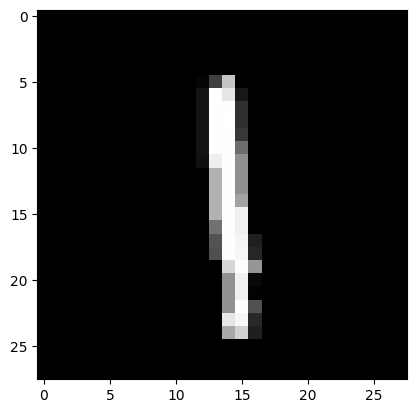

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
y_train.shape

(60000,)

In [8]:
X_train.min()

0

In [9]:
X_train.max()

255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()

0.0

In [12]:
X_train_scaled.max()

1.0

In [13]:
y_train[0]

5

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape

(60000, 10)

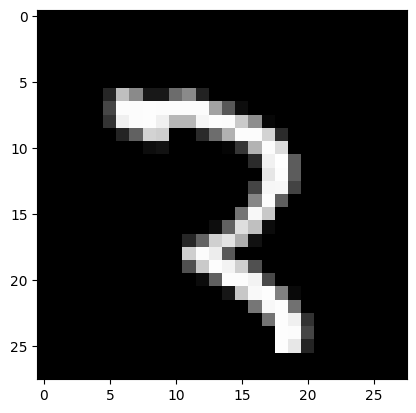

In [17]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [18]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [20]:
model = keras.Sequential()
model.add (layers.Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu'))
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (25, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 25)                825       
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                        

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [23]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 28s 29ms/step - loss: 0.2540 - accuracy: 0.9268 - val_loss: 0.0926 - val_accuracy: 0.9699
Epoch 2/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0823 - accuracy: 0.9757 - val_loss: 0.0757 - val_accuracy: 0.9769
Epoch 3/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0581 - accuracy: 0.9831 - val_loss: 0.0523 - val_accuracy: 0.9830
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0472 - val_accuracy: 0.9837
Epoch 5/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0499 - val_accuracy: 0.9834


In [24]:
metrics = pd.DataFrame(model.history.history)

In [25]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.254047,0.926800,0.092572,0.9699
1,0.082276,0.975700,0.075677,0.9769
2,0.058113,0.983067,0.052340,0.9830
3,0.045290,0.985967,0.047226,0.9837
4,0.036199,0.988867,0.049908,0.9834


M.Harikrishna 
212221230059


<Axes: >

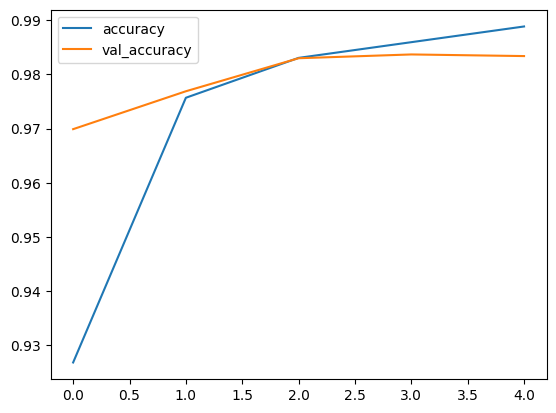

In [26]:
print("M.Harikrishna ")
print("212221230059")
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

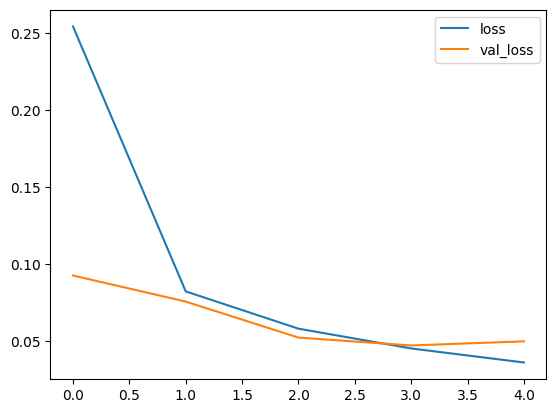

In [27]:
metrics[['loss','val_loss']].plot()

In [28]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [29]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 968    0    3    0    1    1    3    1    3    0]
 [   0 1129    2    0    0    0    1    1    2    0]
 [   2    3 1011    2    1    0    0    9    4    0]
 [   0    0    1  998    0    2    0    6    3    0]
 [   1    0    2    0  969    0    1    2    2    5]
 [   1    0    0   13    0  872    1    0    5    0]
 [   4    3    0    0    3    1  943    0    4    0]
 [   1    2    5    1    0    0    0 1018    1    0]
 [   2    0    4    3    0    1    1    3  958    2]
 [   2    2    1    7   12    2    0    6    9  968]]


In [30]:
print("M.HARIKRISHNA")
print(classification_report(y_test,x_test_predictions))

M.HARIKRISHNA
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
img = image.load_img('0.png')


In [33]:

type(img)

PIL.Image.Image

In [35]:
img = image.load_img('0.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [36]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 44ms/step


In [37]:
print(x_single_prediction)

[0]


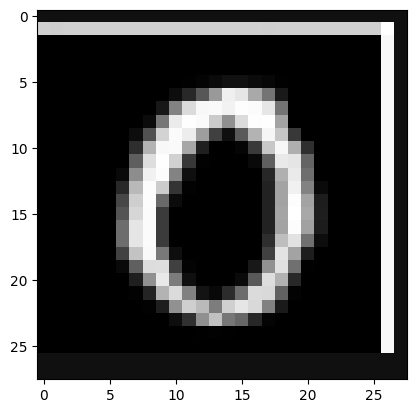

In [38]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [39]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [40]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 31ms/step


In [41]:
print(x_single_prediction)

[6]
